In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [5]:
main_path = 'D:\\Downloads\\'

df = pd.read_csv(main_path + 'mnist_test_nolabels\\mnist_test_nolabels.csv')

In [8]:
display(df)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
display(df.shape)
print(df.isnull().sum().sum(), "total missing values")

(10000, 784)

0 total missing values


In [17]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(df)
display(X_Scaled.shape)


pca = PCA()
pca.fit(X_Scaled)

explained_variance = pca.explained_variance_ratio_

print("Number of components : ", len(explained_variance))
print("First 10 variance ratios:", explained_variance[:10])

(10000, 784)

Number of components :  784
First 10 variance ratios: [0.06196825 0.04243746 0.04044453 0.0323059  0.02755073 0.02409125
 0.02045291 0.01883155 0.01670851 0.01517525]


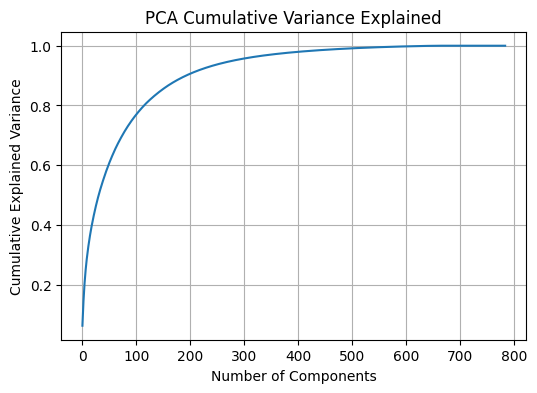

In [22]:
# cumulative explained variance
cumulative_var = np.cumsum(explained_variance)
plt.figure(figsize=(6,4))
plt.plot(cumulative_var)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Variance Explained")
plt.grid(True)
plt.show()


(10000, 2)
[[-5.45831116  6.41400668]
 [ 2.80443233 -8.02885014]
 [-7.41124146 -3.86404387]
 [ 8.75124179  0.04599095]
 [-0.06575553  6.29629039]]


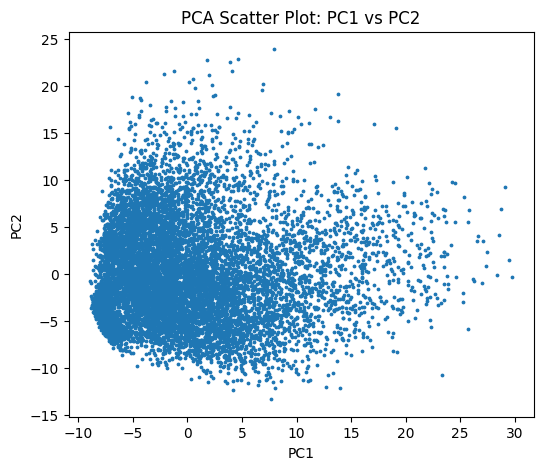

In [25]:
# Project data onto the first 2 PCs
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_Scaled)

print(X_pca_2.shape)
print(X_pca_2[:5])

plt.figure(figsize=(6,5))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], s=3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot: PC1 vs PC2")
plt.show()

(10000, 2)
[[-6.3603996e+01  3.8872662e+01]
 [-5.5650526e-01 -7.9163506e+01]
 [-4.7206173e+01 -3.8184715e+01]
 [ 6.0900440e+01  1.2517065e+01]
 [ 3.9904468e-02  5.2527222e+01]]


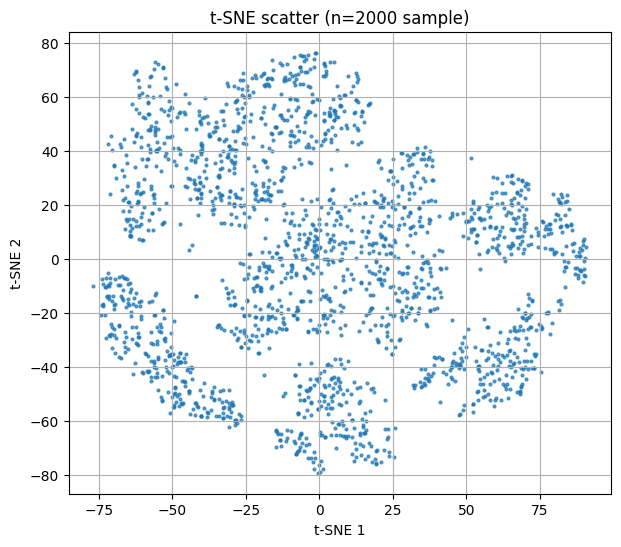

In [32]:
# 1) Reduce to 50 dimensions for speed
pca_50 = PCA(n_components=50)
X_pca_50 = pca_50.fit_transform(X_Scaled)

# 2) Run t-SNE (no n_iter here)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_pca_50)

print(X_tsne.shape)
print(X_tsne[:5])


n_plot = 2000  # change to 10000 to plot all points
idx = np.random.choice(X_tsne.shape[0], n_plot, replace=False)
X_sub = X_tsne[idx]

plt.figure(figsize=(7,6))
plt.scatter(X_sub[:,0], X_sub[:,1], s=4, alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title(f"t-SNE scatter (n={n_plot} sample)")
plt.grid(True)
plt.show()
